In [ ]:
import sys
import warnings

warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    
    sys.path.append('..')
    !pip install easyagent
    


In [4]:
import easyagents.agents
easyagents.agents.seed=0
    
from easyagents.agents import get_backends, DqnAgent, RandomAgent, PpoAgent, ReinforceAgent, SacAgent
from easyagents.callbacks import log, plot, duration

print(easyagents.__version__)
print(get_backends())

1.1.23
['default', 'tfagents', 'tensorforce', 'kerasrl']


In [5]:
backend='tfagents'
easyagents.callbacks.plot.on_play_end_clear_jupyter_display: bool = False
easyagents.callbacks.plot.on_train_end_clear_jupyter_display: bool = True

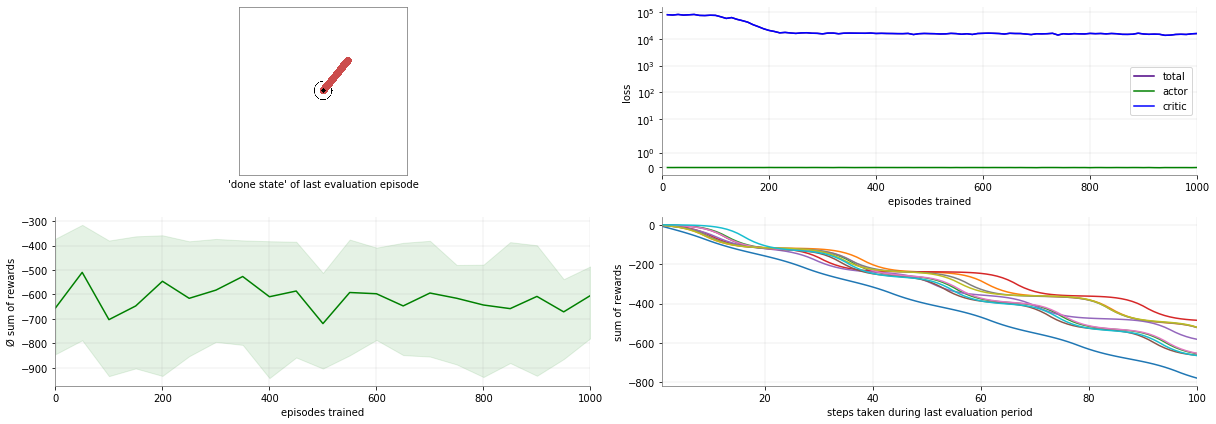

In [17]:
sacAgent = PpoAgent('Pendulum-v0', backend=backend)
sacAgent.train([plot.State(),plot.Loss(),plot.Rewards(), plot.StepRewards()], max_steps_per_episode=100)

### Random

In [ ]:
randomAgent = RandomAgent('CartPole-v0', backend=backend)
randomAgent.train()

In [ ]:
randomAgent = RandomAgent('CartPole-v0', backend=backend)
randomAgent.play()

### Dqn

Wall time: 1.5 s


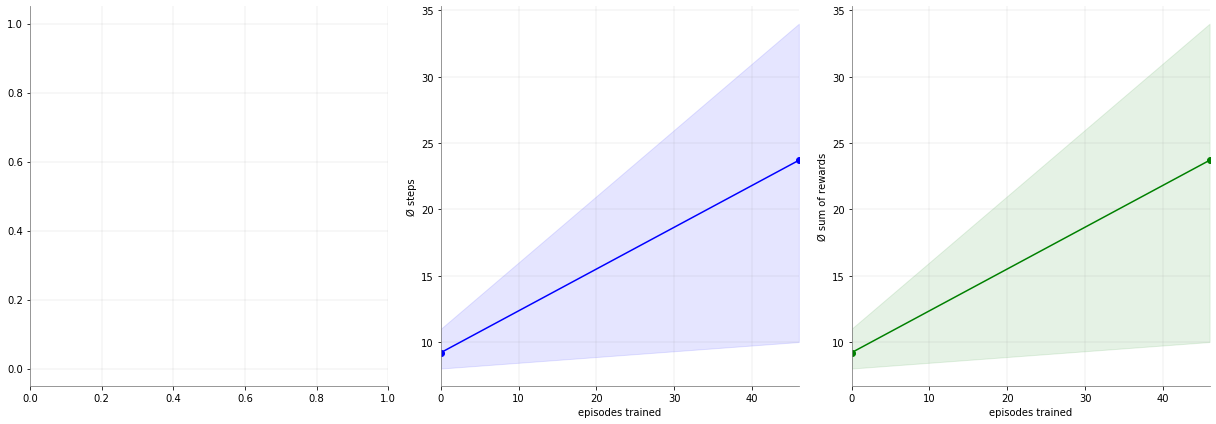

In [3]:
%%time
dqnAgent = DqnAgent('CartPole-v0',backend=backend)
dqnAgent.train(num_iterations=1000)


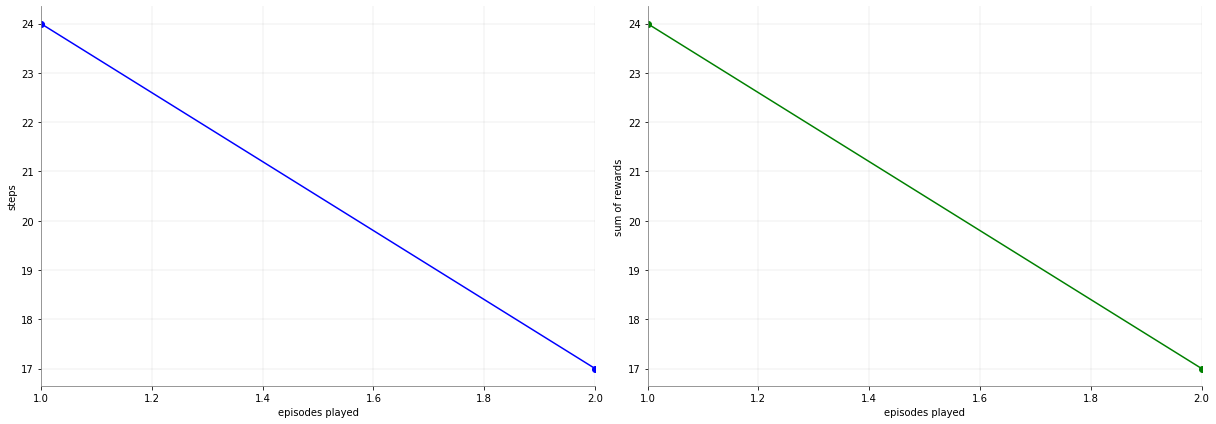

In [6]:
dqnAgent.play(num_episodes=2)

### Ppo

In [ ]:
%%time

ppoAgent = PpoAgent('CartPole-v0', backend=backend)
ppoAgent.train(num_iterations=10)

In [ ]:
ppoAgent.play(num_episodes=3)

### Reinforce

In [ ]:
%%time

reinforceAgent = ReinforceAgent('CartPole-v0', backend=backend)
reinforceAgent.train(num_iterations=10)

In [ ]:
reinforceAgent.play(num_episodes=3)